Seeding for reproducibility

In [ ]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

Importing the dependencies

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

Data Curation

In [ ]:
!pip install kaggle

In [ ]:
kaggle_credentials = json.load(open("kaggle.json"))

In [ ]:
os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [00:11<00:00, 174MB/s]
100% 2.04G/2.04G [00:11<00:00, 186MB/s]


In [ ]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [ ]:
# Unzip the downloaded dataset
with ZipFile('plantvillage-dataset.zip', 'r') as zip_ref:
   zip_ref.extractall()

In [ ]:
print(os.listdir('plantvillage dataset'))


print(len(os.listdir('plantvillage dataset/segmented')))
print(os.listdir('plantvillage dataset/segmented')[:5])

print(len(os.listdir('plantvillage dataset/color')))
print(os.listdir('plantvillage dataset/color')[:5])

print(len(os.listdir('plantvillage dataset/grayscale')))
print(os.listdir('plantvillage dataset/grayscale')[:5])

['segmented', 'color', 'grayscale']
38
['Potato___Early_blight', 'Corn_(maize)___Common_rust_', 'Tomato___Target_Spot', 'Orange___Haunglongbing_(Citrus_greening)', 'Apple___Cedar_apple_rust']
38
['Potato___Early_blight', 'Corn_(maize)___Common_rust_', 'Tomato___Target_Spot', 'Orange___Haunglongbing_(Citrus_greening)', 'Apple___Cedar_apple_rust']
38
['Potato___Early_blight', 'Corn_(maize)___Common_rust_', 'Tomato___Target_Spot', 'Orange___Haunglongbing_(Citrus_greening)', 'Apple___Cedar_apple_rust']


Number of Classes = 38

In [ ]:
print(len(os.listdir('plantvillage dataset/color/Pepper,_bell___Bacterial_spot')))
print(os.listdir('plantvillage dataset/color/Pepper,_bell___Bacterial_spot')[:5])

997
['c8080916-dd9d-40c4-a39b-1957ebd17b87___NREC_B.Spot 9115.JPG', '505ac655-cca9-479c-8a2f-35a01b9030cf___JR_B.Spot 8836.JPG', '697e19e9-b11b-4bc8-884b-e25d432b90f6___NREC_B.Spot 9206.JPG', 'f896c5eb-0ec3-4480-bddc-10977b344277___NREC_B.Spot 1932.JPG', 'fc45e7eb-9b7f-43ae-a769-2b9ab7f85eee___JR_B.Spot 3106.JPG']


Data Reprocessing

In [ ]:
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


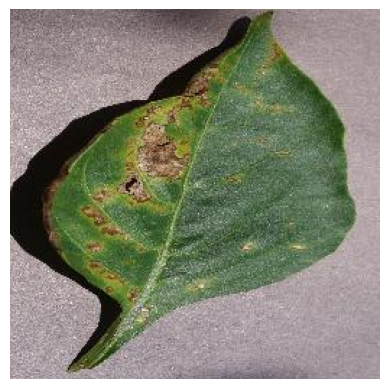

In [ ]:
image_path = '/content/plantvillage dataset/color/Pepper,_bell___Bacterial_spot/0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG'

img = mpimg.imread(image_path)

print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
image_path = '/content/plantvillage dataset/color/Pepper,_bell___Bacterial_spot/0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG'

img = mpimg.imread(image_path)

print(img)

[[[109  94  97]
  [103  88  91]
  [134 119 122]
  ...
  [164 148 149]
  [169 153 154]
  [179 163 164]]

 [[138 123 126]
  [113  98 101]
  [130 115 118]
  ...
  [164 148 149]
  [163 147 148]
  [166 150 151]]

 [[147 132 135]
  [ 99  84  87]
  [154 139 142]
  ...
  [168 152 153]
  [162 146 147]
  [160 144 145]]

 ...

 [[155 142 149]
  [171 158 165]
  [217 204 211]
  ...
  [156 143 152]
  [156 143 152]
  [155 142 151]]

 [[162 149 156]
  [141 128 135]
  [149 136 143]
  ...
  [170 157 166]
  [172 159 168]
  [170 157 166]]

 [[178 165 172]
  [167 154 161]
  [196 183 190]
  ...
  [166 153 162]
  [171 158 167]
  [170 157 166]]]


In [ ]:
img_size = 224
batch_size = 32

Train Test Split

In [ ]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 # Use 20% of data for validation
)

In [ ]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training', # Use only training data
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [ ]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation', # Use only validation data
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


Convolutional Neural Network

In [ ]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model Training

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Corrected this line
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 130s 90ms/step - accuracy: 0.6055 - loss: 1.8680 - val_accuracy: 0.8345 - val_loss: 0.5155
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.7027
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 126s 84ms/step - accuracy: 0.9157 - loss: 0.2628 - val_accuracy: 0.8642 - val_loss: 0.4398
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 11us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 7.1526e-07
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 154s 93ms/step - accuracy: 0.9648 - loss: 0.1092 - val_accuracy: 0.8756 - val_loss: 0.4698


Model Evaluation

In [ ]:
print('Evaluating model...')
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.8776 - loss: 0.4719
Validation Accuracy: 87.56%


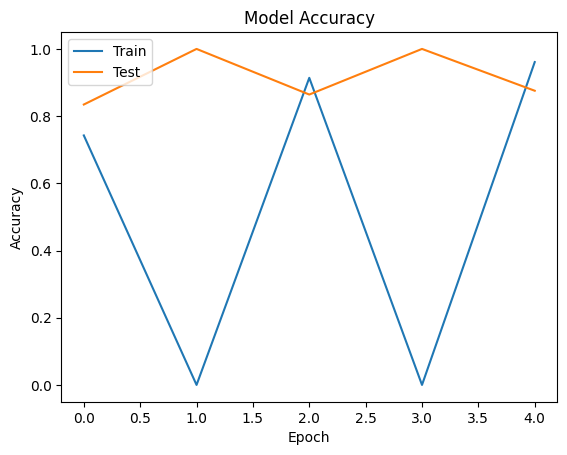

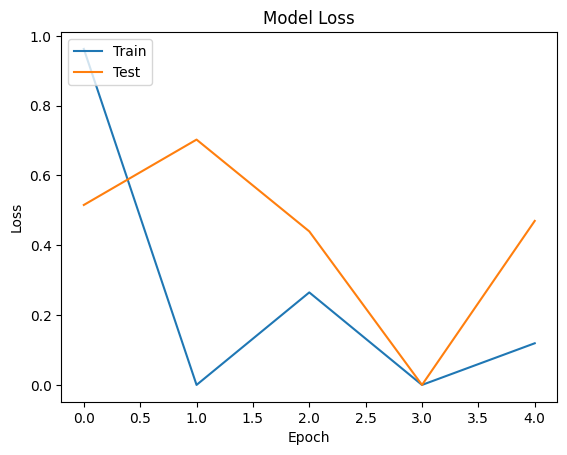

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Building a Predictve System

In [ ]:
# Load and Reprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_rray = img_array.astype('float32') / 255.
    return img_array

# Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    prediction = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [ ]:
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [ ]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
# Example Usage
image_path = '/content/test_blueberry_healthy.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)
print(f'The predicted class is: {predicted_class_name}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
The predicted class is: Blueberry___healthy


Save the model to GDrive

In [ ]:
model.save('drive/MyDrive/my_model.h5')